In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df = df.drop(['id','date','zipcode','lat','long'], axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [7]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.duplicated().sum()

6

In [10]:
df.drop_duplicates(inplace = True)

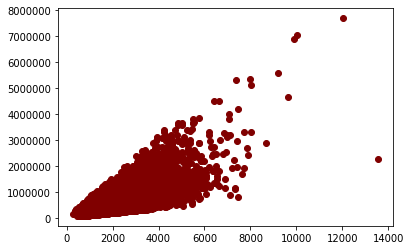

In [11]:
plt.scatter(df['sqft_living'],df.price, color = 'Maroon')
plt.show()

In [13]:
#Splitting into input and output
X = df.iloc[:,1:]
y = df['price']

In [17]:
#Splitting in train and test
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16205, 15)
(16205,)
(5402, 15)
(5402,)


In [3]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error
print("The average price differenc is:", mean_absolute_error(y_test, y_pred))

The average price differenc is: 139399.9562685728


In [29]:
model.score(x_test, y_test)

0.6540154190283485

In [80]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(x_train,y_train)

Ridge(alpha=1)

In [81]:
ridge_model.score(x_test, y_test)

0.6539952269738428

In [76]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=3)
lasso_model.fit(x_train, y_train)

Lasso(alpha=3)

In [77]:
lasso_model.score(x_test, y_test)

0.654013580604021

# Boston House Price prediction

In [2]:
boston = pd.read_csv("BostonHousing.csv")
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

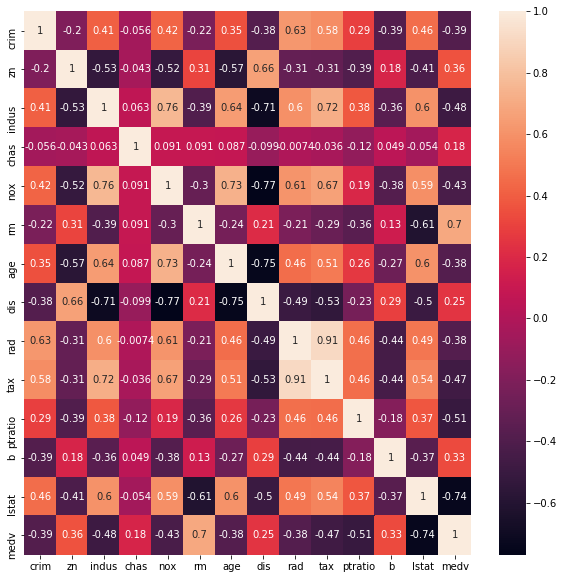

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(boston.corr(),annot=True)
plt.show()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

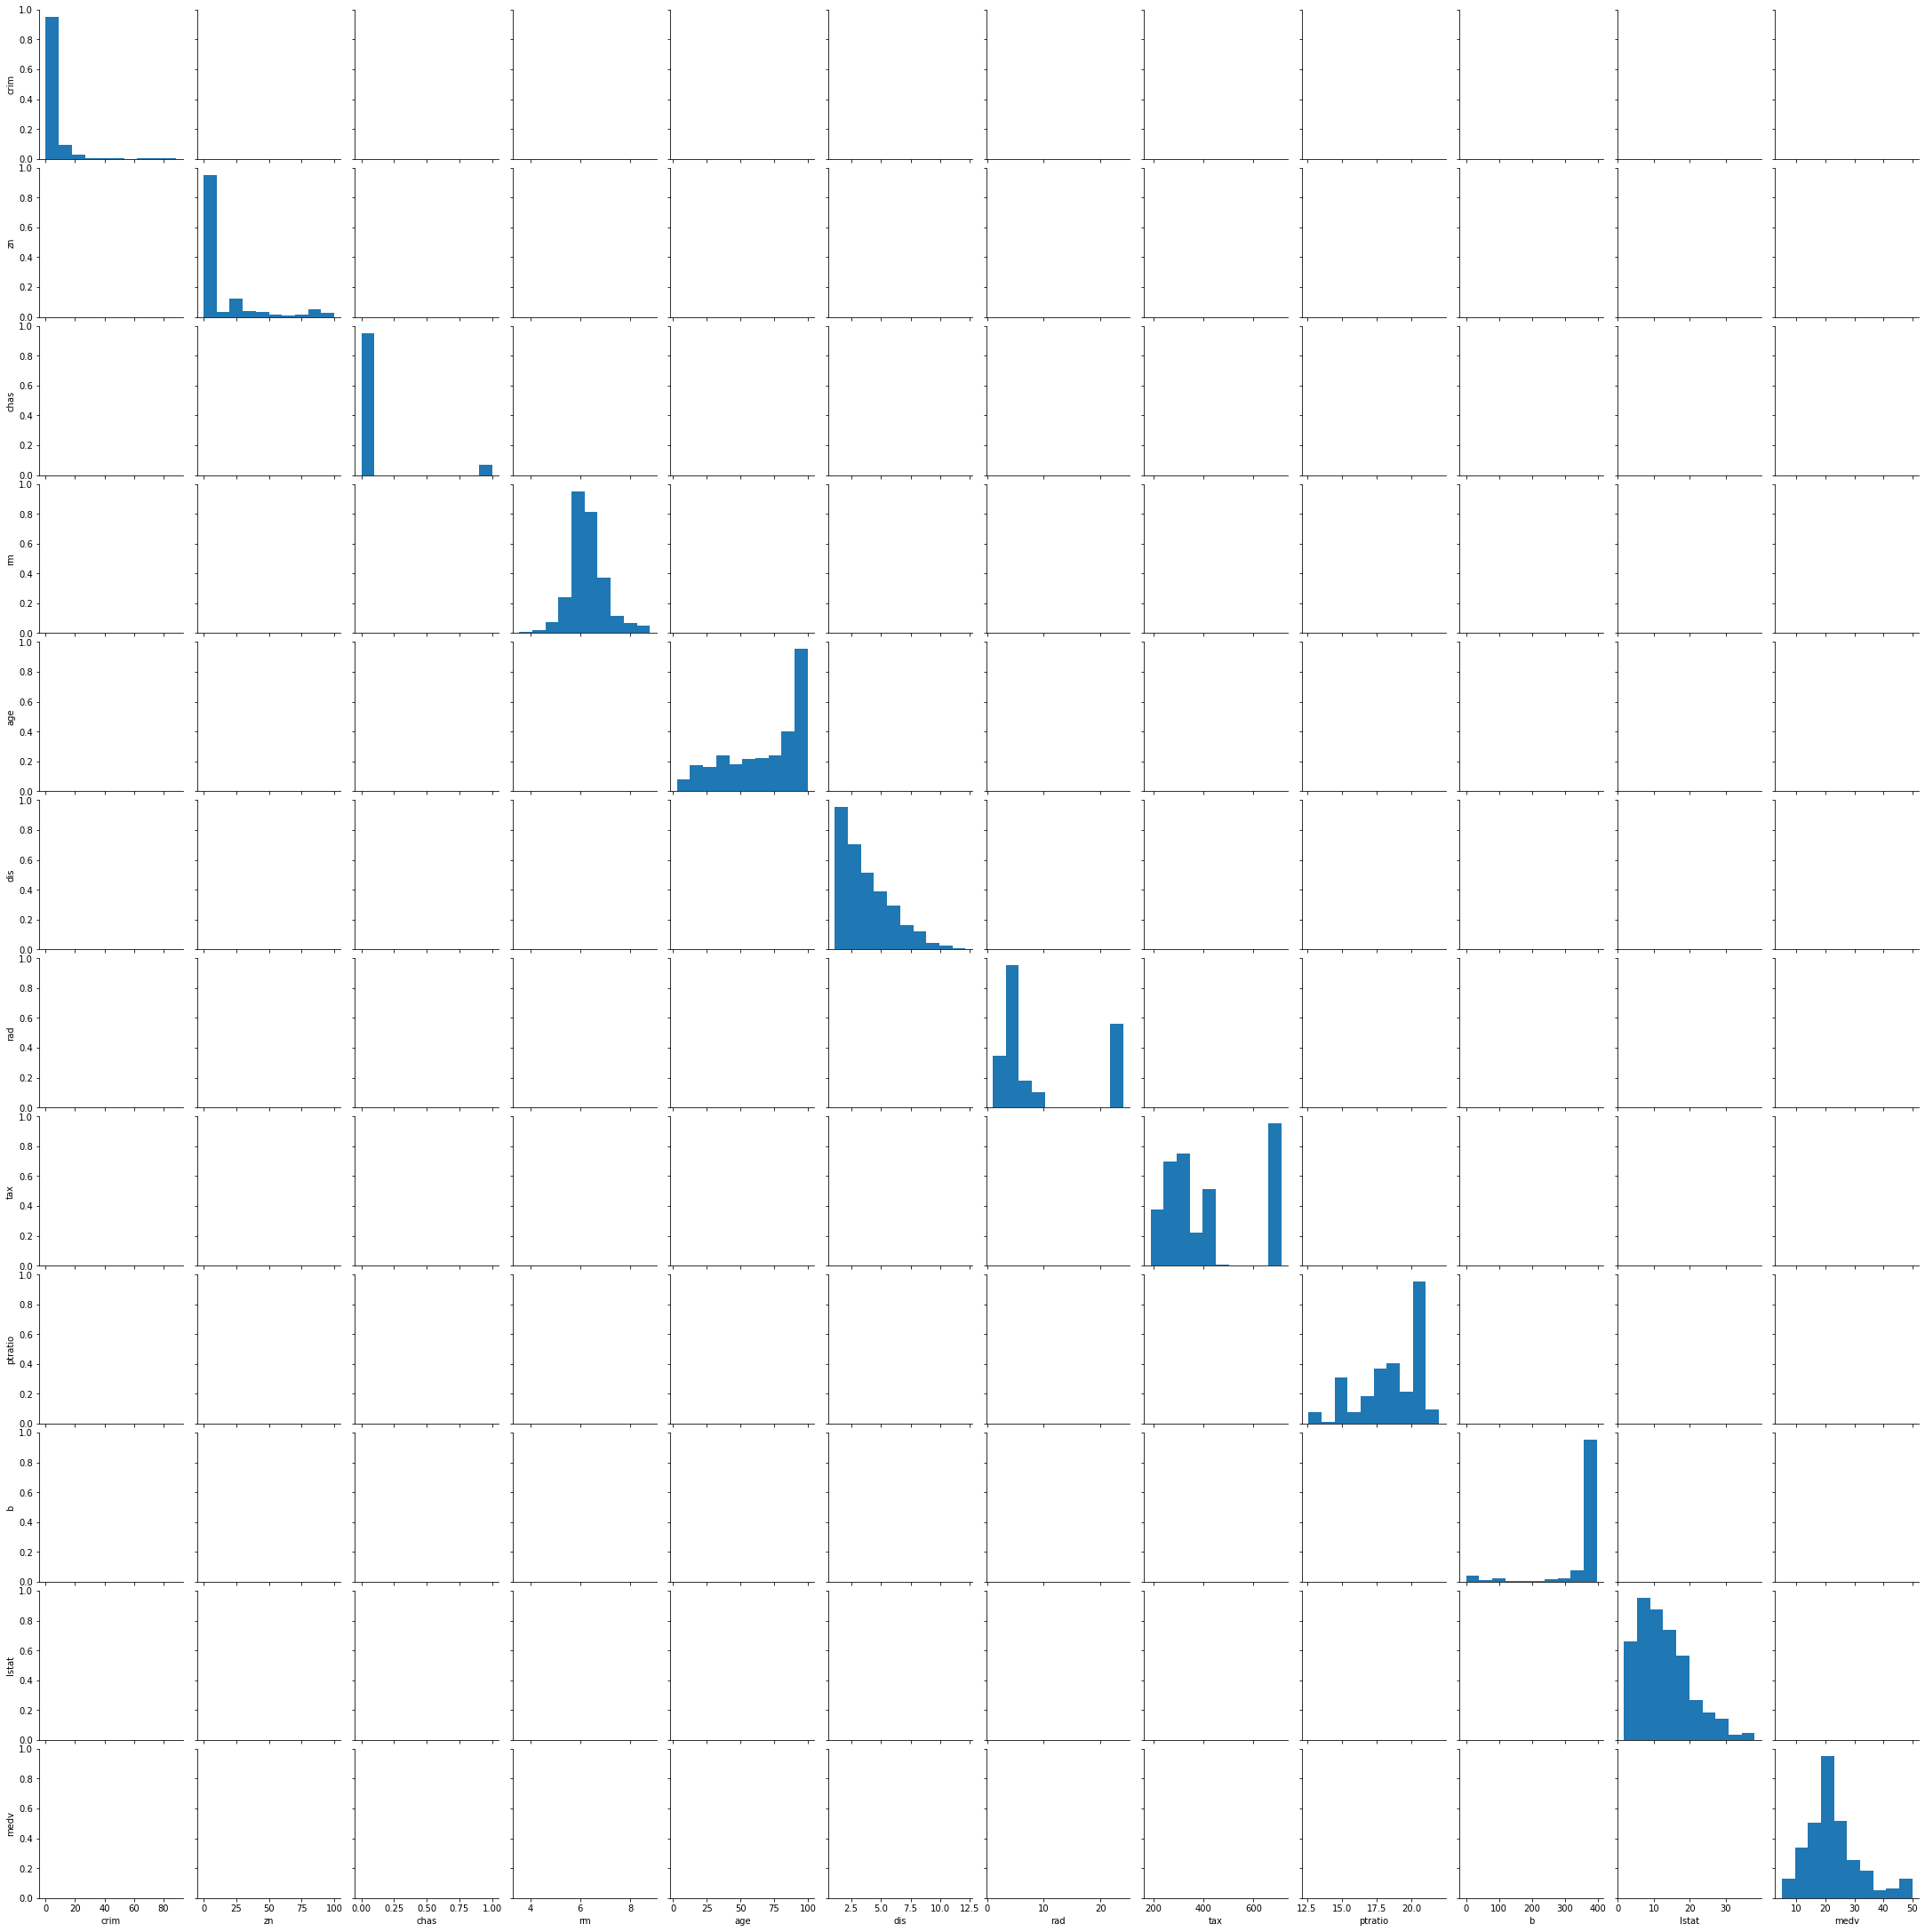

In [6]:
boston.drop(['indus','nox'], axis = 1, inplace = True)
sns.pairplot(boston)
plt.show()

In [7]:
X = boston.iloc[:,:-1]
y = boston['medv']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

(102,)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
print("The average prediction error is:", mean_absolute_error(y_test, y_pred))

The average prediction error is: 3.530614101167894


In [15]:
print("Train score of liner reg.", model.score(x_train, y_train))
print("Test score of liner reg.", model.score(x_test, y_test))

Train score of liner reg. 0.7322853457062513
Test score of liner reg. 0.7020680392503533


In [14]:
from sklearn.linear_model import Ridge, Lasso

In [20]:
r_model = Ridge(alpha=10)
r_model.fit(x_train, y_train)
print(r_model.coef_)

[-0.11931264  0.06746294  1.88844634  3.43630768 -0.00940641 -1.14714403
  0.33462379 -0.01861133 -0.7692437   0.00794263 -0.54694391]


In [17]:
print("Train score of Ridge reg.", r_model.score(x_train, y_train))
print("Test score of Ridge reg.", r_model.score(x_test, y_test))

Train score of Ridge reg. 0.7315853119770623
Test score of Ridge reg. 0.6992187223617502


In [18]:
l_model = Lasso()
l_model.fit(x_train, y_train)
print("Train score of Lasso reg.", l_model.score(x_train, y_train))
print("Test score of Lasso reg.", l_model.score(x_test, y_test))

Train score of Lasso reg. 0.6839549628871016
Test score of Lasso reg. 0.6258057188922015


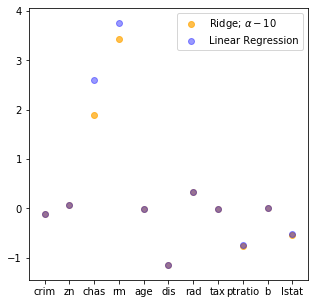

In [26]:
features = boston.columns[0:11]
output = boston['medv']

plt.figure(figsize=(5,5))
plt.scatter(features, r_model.coef_ ,alpha=0.7,color="Orange",label=r'Ridge; $\alpha-10$')
plt.scatter(features,model.coef_ , alpha=0.4, color = 'Blue', label = 'Linear Regression')
plt.legend()
plt.show()

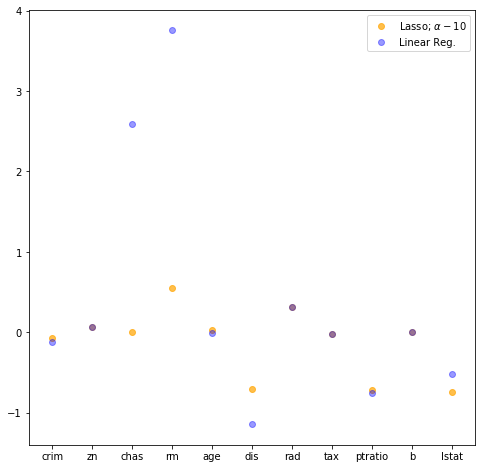

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(features, l_model.coef_ ,alpha=0.7, color="Orange",label=r'Lasso; $\alpha-10$')
plt.scatter(features,model.coef_ , alpha=0.4,color="Blue",label='Linear Reg.')
plt.legend()
plt.show()